In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# liability customers = Customers with savings or current account
#  Borrowers          = Customers who have taken a loan

In [3]:
df1 = pd.read_csv(r"Part2 - Data1 random forest.csv")
df2 = pd.read_csv(r'Part2 -Data2 random forest.csv')

In [4]:
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [5]:
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [6]:
df = pd.merge(df1,df2,how='outer',on='ID')
df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [7]:
df.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df['ZipCode'].nunique()

467

In [10]:
df[(df['CreditCard'] == 0) & (df['LoanOnCard']==1)]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
16,17,38,14,130,95010,4,4.7,3,134,0,0,0,0,1.0
18,19,46,21,193,91604,2,8.1,3,0,0,0,0,0,1.0
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,0,1.0
42,43,32,7,132,90019,4,1.1,2,412,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,4843,49,23,174,95449,3,4.6,2,590,0,0,0,0,1.0
4846,4847,35,10,135,94596,3,4.8,2,0,0,0,1,0,1.0
4859,4860,34,8,165,91107,1,7.0,3,541,0,0,0,0,1.0
4876,4877,44,19,142,95054,1,1.5,3,0,0,0,0,0,1.0


<Axes: >

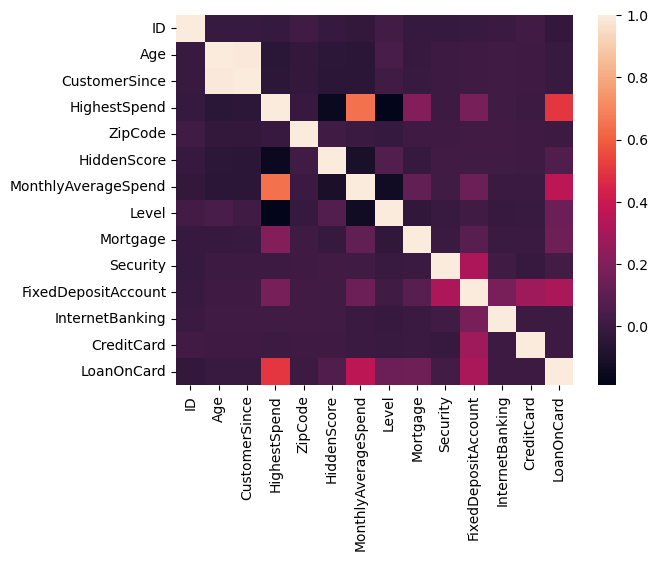

In [11]:
# sns.pairplot(df)
sns.heatmap(df.corr())

In [12]:
#  Check for target balancing --- and fix it if found imbalanced
df['LoanOnCard'].value_counts(normalize=True)

0.0    0.903614
1.0    0.096386
Name: LoanOnCard, dtype: float64

## Splitting teh data

In [13]:
from sklearn.model_selection import train_test_split

# mf = df.iloc[4000:,:]
# df = df.iloc[0:4000,:]

X = df.drop(['LoanOnCard','ZipCode'],axis = 1)
y = df['LoanOnCard']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Random Forest 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [15]:
rf = RandomForestClassifier(n_estimators=10 , random_state=1 ) 
rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=1)

In [16]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9979016786570744
0.9787104622871047


In [17]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1791095845),
 DecisionTreeClassifier(max_features='sqrt', random_state=2135392491),
 DecisionTreeClassifier(max_features='sqrt', random_state=946286476),
 DecisionTreeClassifier(max_features='sqrt', random_state=1857819720),
 DecisionTreeClassifier(max_features='sqrt', random_state=491263),
 DecisionTreeClassifier(max_features='sqrt', random_state=550290313),
 DecisionTreeClassifier(max_features='sqrt', random_state=1298508491),
 DecisionTreeClassifier(max_features='sqrt', random_state=2143362693),
 DecisionTreeClassifier(max_features='sqrt', random_state=630311759),
 DecisionTreeClassifier(max_features='sqrt', random_state=1013994432)]

## Tuning

In [18]:
model_performance = []
for t in [100,200,300]:
    for d in [5,10,20,30,40]:
        for l in [300,400,500] :
            rf = RandomForestClassifier(n_estimators=t , max_depth=d,min_samples_leaf=l ,random_state=1) 
            rf.fit(X_train,y_train.ravel())
            train_pred = rf.predict_proba(X_train)
            test_pred = rf.predict_proba(X_test)
            t1 = 'trees'+str(t)+'_maxDepth'+str(d)+'_minLeaf'+str(l)
            t2 = [t1,round( roc_auc_score(y_train,train_pred[:,1]),4 ) , round( roc_auc_score(y_test,test_pred[:,1]),4 ) ]
            model_performance.append(t2)

In [19]:
model_performance_df = pd.DataFrame(model_performance)
model_performance_df.rename(columns = {0:'Details',1:'Train Auc',2:'Test Auc'},inplace = True)

In [20]:
model_performance_df.sort_values(by = ['Test Auc','Train Auc'] , ascending=[False,False]).head(10)

,Details,Train Auc,Test Auc
0,trees100_maxDepth5_minLeaf300,0.9666,0.9537
3,trees100_maxDepth10_minLeaf300,0.9666,0.9537
6,trees100_maxDepth20_minLeaf300,0.9666,0.9537
9,trees100_maxDepth30_minLeaf300,0.9666,0.9537
12,trees100_maxDepth40_minLeaf300,0.9666,0.9537
15,trees200_maxDepth5_minLeaf300,0.9658,0.9529
18,trees200_maxDepth10_minLeaf300,0.9658,0.9529
21,trees200_maxDepth20_minLeaf300,0.9658,0.9529
24,trees200_maxDepth30_minLeaf300,0.9658,0.9529
27,trees200_maxDepth40_minLeaf300,0.9658,0.9529


## Second round

In [21]:
model_performance = []
for t in [50,100,150]:
    for d in [5,6,7,8,9,10,20,30,40]:
        for l in [100,200,225,250,275,300,325,350,375] :
            rf = RandomForestClassifier(n_estimators=t , max_depth=d,min_samples_leaf=l ,random_state=1) 
            rf.fit(X_train,y_train.ravel())
            train_pred = rf.predict_proba(X_train)
            test_pred = rf.predict_proba(X_test)
            t1 = 'trees'+str(t)+'_maxDepth'+str(d)+'_minLeaf'+str(l)
            t2 = [t1,round( roc_auc_score(y_train,train_pred[:,1]),4 ) , round( roc_auc_score(y_test,test_pred[:,1]),4 ) ]
            model_performance.append(t2)

In [22]:
model_performance_df = pd.DataFrame(model_performance)
model_performance_df.rename(columns = {0:'Details',1:'Train Auc',2:'Test Auc'},inplace = True)

In [23]:
model_performance_df.sort_values(by = ['Test Auc','Train Auc'] , ascending=[False,False]).head(10)

,Details,Train Auc,Test Auc
117,trees100_maxDepth9_minLeaf100,0.9906,0.9838
126,trees100_maxDepth10_minLeaf100,0.9906,0.9838
135,trees100_maxDepth20_minLeaf100,0.9906,0.9838
144,trees100_maxDepth30_minLeaf100,0.9906,0.9838
153,trees100_maxDepth40_minLeaf100,0.9906,0.9838
99,trees100_maxDepth7_minLeaf100,0.9907,0.9837
108,trees100_maxDepth8_minLeaf100,0.9906,0.9837
198,trees150_maxDepth9_minLeaf100,0.9891,0.9817
207,trees150_maxDepth10_minLeaf100,0.9891,0.9817
216,trees150_maxDepth20_minLeaf100,0.9891,0.9817


## Third Round

In [24]:
# model_performance = []
# for t in [100,125,150,175,200]:
#     for d in [5,10,20,30,40]:
#         for l in [300,400,500] :
#             rf = RandomForestClassifier(n_estimators=t , max_depth=d,min_samples_leaf=l ,random_state=1) 
#             rf.fit(X_train,y_train.ravel())
#             train_pred = rf.predict_proba(X_train)
#             test_pred = rf.predict_proba(X_test)
#             t1 = 'trees'+str(t)+'_maxDepth'+str(d)+'_minLeaf'+str(l)
#             t2 = [t1,round( roc_auc_score(y_train,train_pred[:,1]),4 ) , round( roc_auc_score(y_test,test_pred[:,1]),4 ) ]
#             model_performance.append(t2)

In [25]:
# model_performance_df = pd.DataFrame(model_performance)
# model_performance_df.rename(columns = {0:'Details',1:'Train Auc',2:'Test Auc'},inplace = True)

In [26]:
# model_performance_df.sort_values(by = ['Test Auc','Train Auc'] , ascending=[False,False]).head(10)

## four

In [27]:
model_performance = []
for t in [175,200,210,225,250]:
    for d in [5,10,20,30,40]:
        for l in [200,250,300,350,400] :
            rf = RandomForestClassifier(n_estimators=t , max_depth=d,min_samples_leaf=l ,random_state=1) 
            rf.fit(X_train,y_train.ravel())
            train_pred = rf.predict_proba(X_train)
            test_pred = rf.predict_proba(X_test)
            t1 = 'trees'+str(t)+'_maxDepth'+str(d)+'_minLeaf'+str(l)
            t2 = [t1,round( roc_auc_score(y_train,train_pred[:,1]),4 ) , round( roc_auc_score(y_test,test_pred[:,1]),4 ) ]
            model_performance.append(t2)

In [28]:
model_performance_df = pd.DataFrame(model_performance)
model_performance_df.rename(columns = {0:'Details',1:'Train Auc',2:'Test Auc'},inplace = True)

In [29]:
model_performance_df.sort_values(by = ['Test Auc','Train Auc'] , ascending=[False,False]).head(10)

,Details,Train Auc,Test Auc
5,trees175_maxDepth10_minLeaf200,0.9735,0.9619
10,trees175_maxDepth20_minLeaf200,0.9735,0.9619
15,trees175_maxDepth30_minLeaf200,0.9735,0.9619
20,trees175_maxDepth40_minLeaf200,0.9735,0.9619
0,trees175_maxDepth5_minLeaf200,0.9734,0.9619
30,trees200_maxDepth10_minLeaf200,0.9714,0.9594
35,trees200_maxDepth20_minLeaf200,0.9714,0.9594
40,trees200_maxDepth30_minLeaf200,0.9714,0.9594
45,trees200_maxDepth40_minLeaf200,0.9714,0.9594
25,trees200_maxDepth5_minLeaf200,0.9713,0.9594


## Best features

In [30]:
len(rf.feature_importances_)

12

In [31]:
len(X_train.columns)

12

In [32]:
rf = RandomForestClassifier(n_estimators=250 , max_depth=10 , min_samples_leaf= 200)

rf.fit(X_train,y_train)
print("Train Model Score : ",rf.score(X_train,y_train))
print("Test Model Score : ",rf.score(X_test,y_test))

train_pred = rf.predict_proba(X_train)
test_pred = rf.predict_proba(X_test)

print("Train Auc : ",round( roc_auc_score(y_train , train_pred[:,1]),4) )
print("Test Auc : ",round( roc_auc_score(y_test , test_pred[:,1]),4) )



t1 = []
for i in range(0,len(X_train.columns)):
    t2 =[ X_train.columns[i] , rf.feature_importances_[i]]
    t1.append(t2)
ImpFeat = pd.DataFrame(t1,columns=['Name','Imp'])
ImpFeat.sort_values(by =['Imp'],ascending=False).head(5)

Train Model Score :  0.9067745803357314
Test Model Score :  0.8972019464720195
Train Auc :  0.9652
Test Auc :  0.9503


,Name,Imp
3,HighestSpend,0.503685
5,MonthlyAverageSpend,0.385089
6,Level,0.044548
7,Mortgage,0.035643
4,HiddenScore,0.010091


In [33]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
print("Train Model Score : ",rf.score(X_train,y_train))
print("Test Model Score : ",rf.score(X_test,y_test))

train_pred = rf.predict_proba(X_train)
test_pred = rf.predict_proba(X_test)

print("Train Auc : ",round( roc_auc_score(y_train , train_pred[:,1]),4) )
print("Test Auc : ",round( roc_auc_score(y_test , test_pred[:,1]),4) )



t1 = []
for i in range(0,len(X_train.columns)):
    t2 =[ X_train.columns[i] , rf.feature_importances_[i]]
    t1.append(t2)
ImpFeat = pd.DataFrame(t1,columns=['Name','Imp'])
ImpFeat.sort_values(by =['Imp'],ascending=False).head(5)

Train Model Score :  1.0
Test Model Score :  0.9847931873479319
Train Auc :  1.0
Test Auc :  0.9903


,Name,Imp
3,HighestSpend,0.324872
6,Level,0.205089
5,MonthlyAverageSpend,0.162898
4,HiddenScore,0.104733
9,FixedDepositAccount,0.045874


In [34]:
X_train.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard'],
      dtype='object')

In [35]:
RandomForestClassifier?

In [36]:
df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


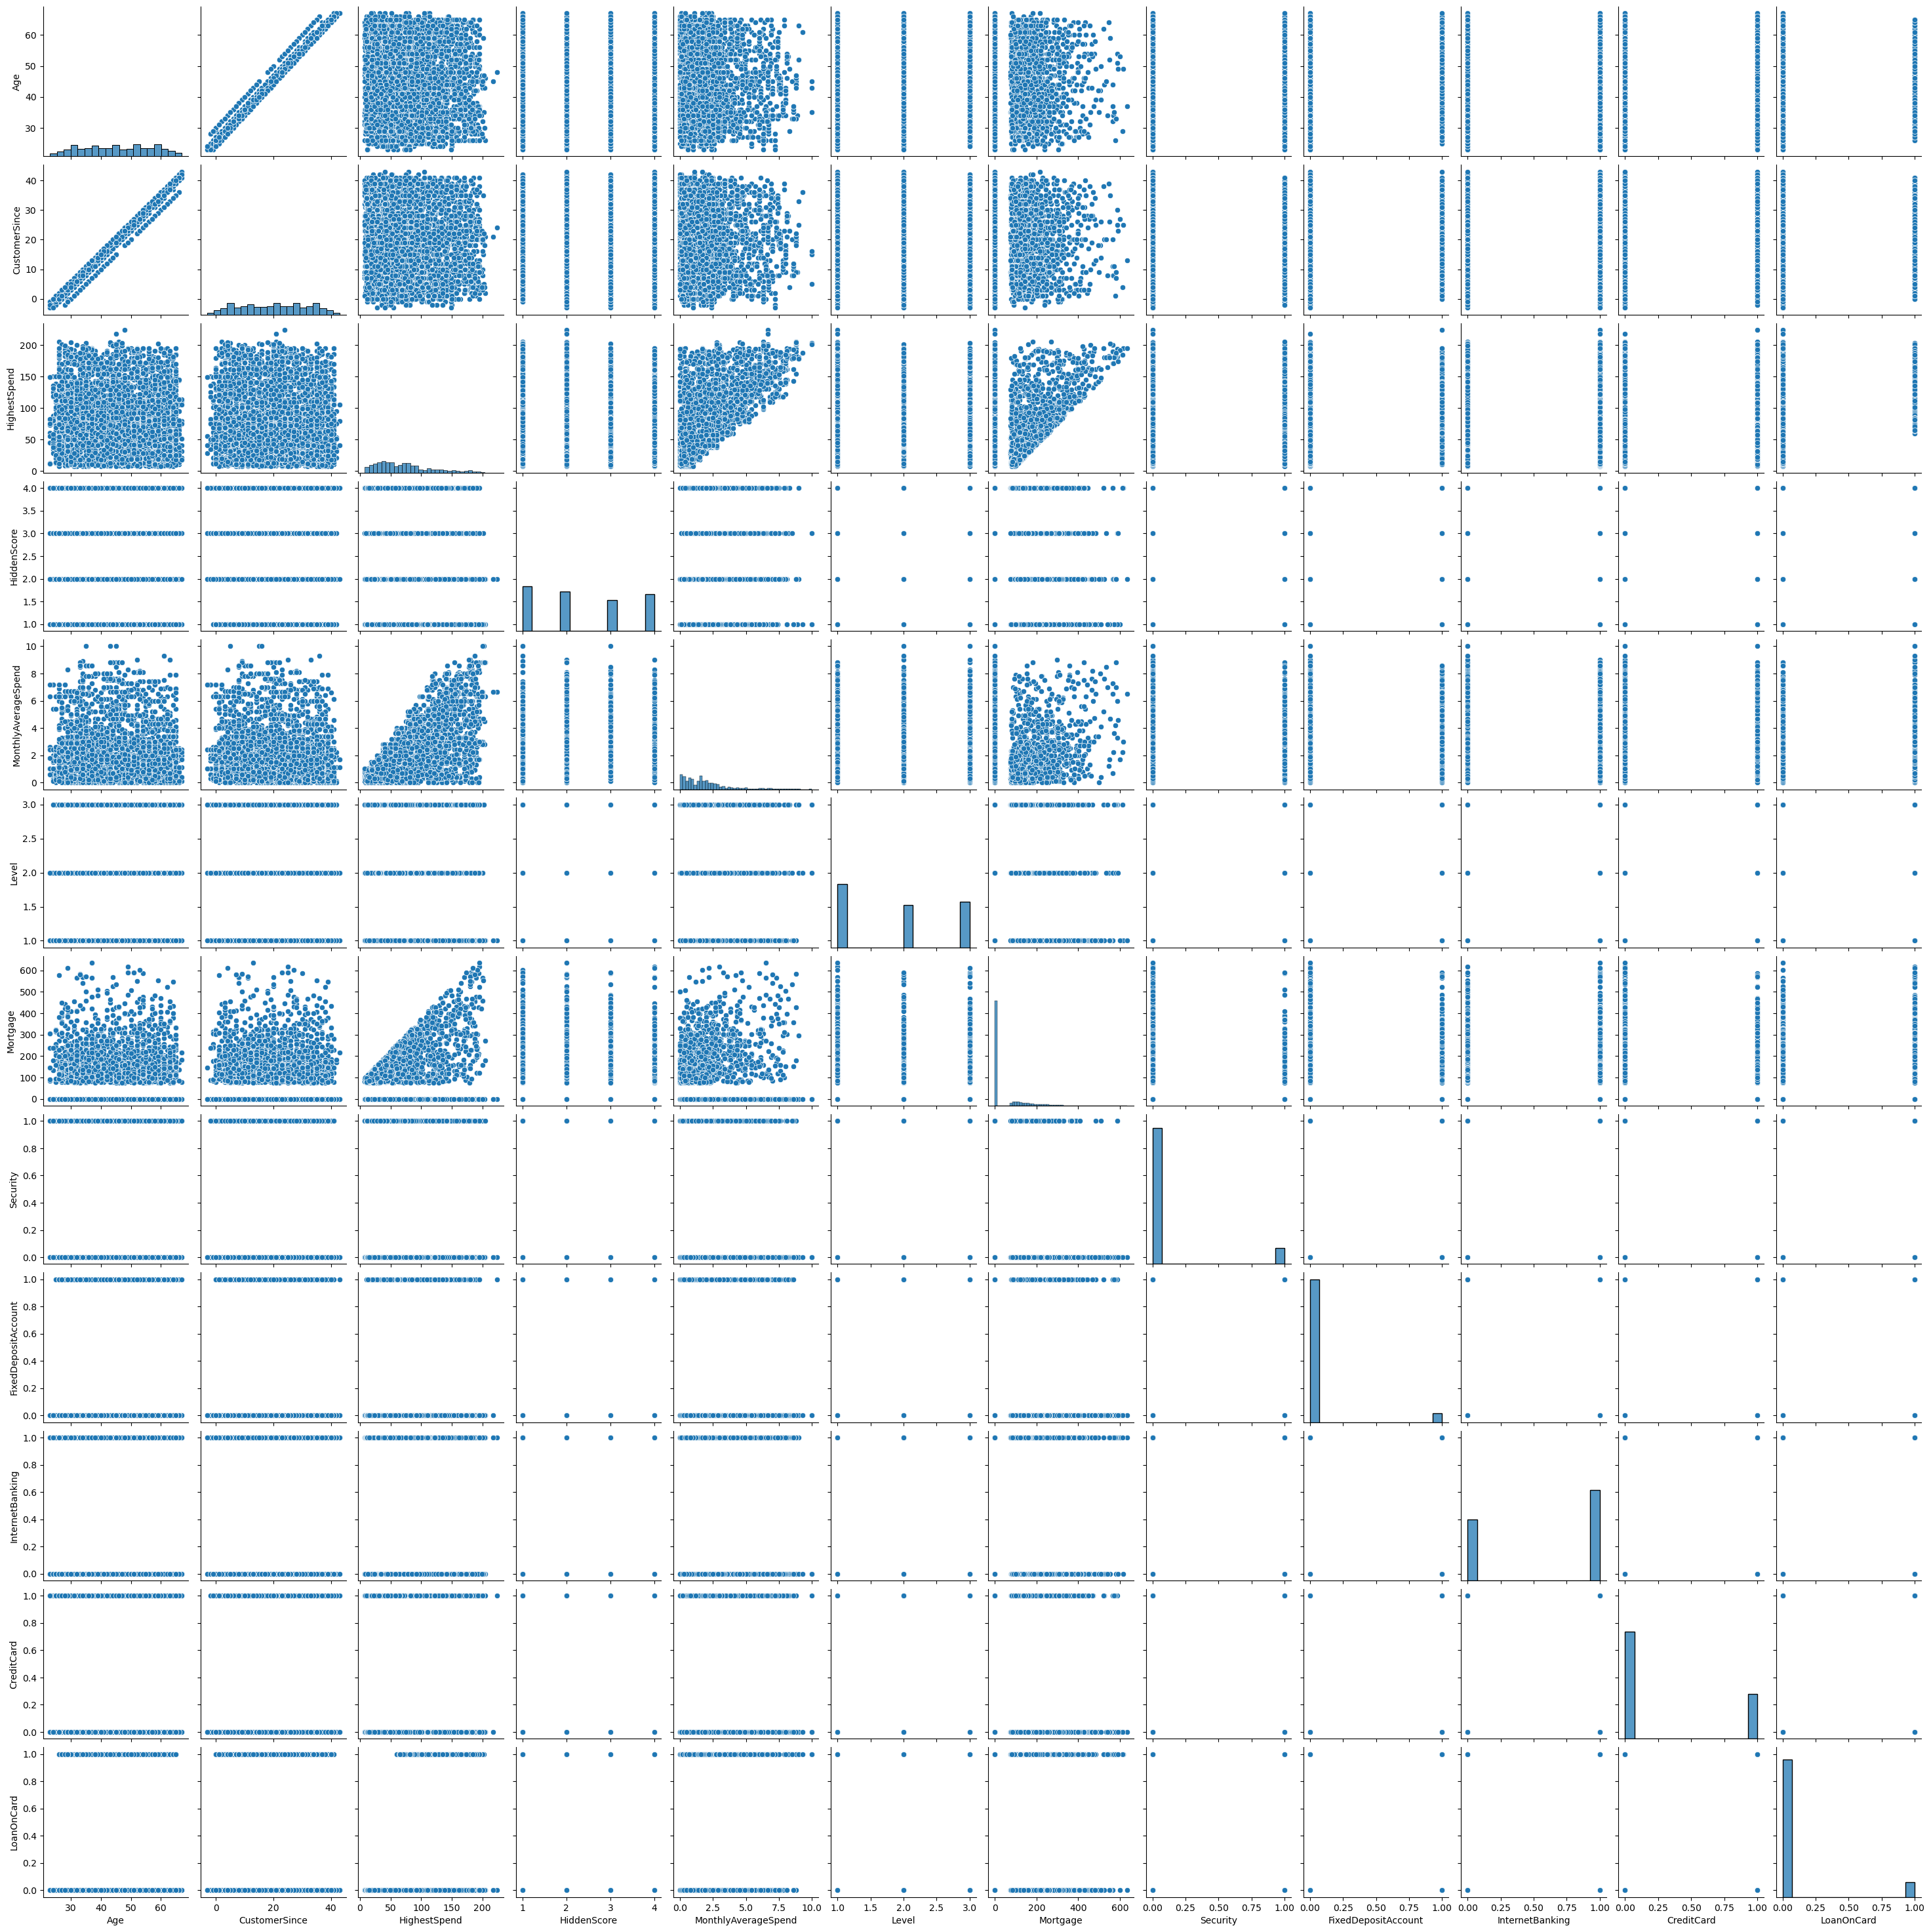

In [37]:
sns.pairplot(df.drop(['ID','ZipCode'],axis=1))